# Expression localization

I would like to make some lollipop graphs for looking at expression patterns across the genome. In particular I would like to visualize the X chromosome and see if genes are expressed in specific places across the genome. 

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import gffutils
import pybedtools

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb

# Setup notebook
nbconfig = Nb.setup_notebook()

# Turn on cache
from joblib import Memory
memory = Memory(cachedir=nbconfig.cache, verbose=0)

last updated: 2018-02-02 
Git hash: f95a97ffaf07b81fdbccd6c0e49ed8ad3f0e208e


In [2]:
REF = os.environ['REFERENCES_DIR']

In [5]:
db = gffutils.FeatureDB(os.path.join(REF, 'dmel/r6-16/gtf/dmel_r6-16.gtf.db'))

/data/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/gffutils/interface.py:161: UserWarning: It appears that this database has not had the ANALYZE sqlite3 command run on it. Doing so can dramatically speed up queries, and is done by default for databases created with gffutils >0.8.7.1 (this database was created with version 0.8.7.1) Consider calling the analyze() method of this object.
  "method of this object." % self.version)


In [6]:
genes = db.features_of_type('gene')

locs = []
for gene in genes:
    locs.append(gffutils.helpers.asinterval(gene))

genes = pybedtools.BedTool(locs)

In [7]:
windows = pybedtools.BedTool().window_maker(g=os.path.join(REF, 'dmel/r6-16/fasta/dmel_r6-16.chromsizes'), 
                                            w=10000,
                                            i='winnum')

In [8]:
len(windows)

15850

In [9]:
overlap = genes.intersect(windows, wao=True)

In [10]:
overlap.head()

chrX	FlyBase	gene	19961297	19969323	.	+	.	gene_id "FBgn0031081"; gene_symbol "Nep3";	chrX	19960000	19970000	1997	8027
 chrX	FlyBase	gene	20025099	20025170	.	+	.	gene_id "FBgn0052826"; gene_symbol "tRNA:Pro-CGG-1-1";	chrX	20020000	20030000	2003	72
 chrX	FlyBase	gene	20051294	20052519	.	+	.	gene_id "FBgn0031085"; gene_symbol "CG9570";	chrX	20050000	20060000	2006	1226
 chrX	FlyBase	gene	20094398	20095767	.	+	.	gene_id "FBgn0062565"; gene_symbol "Or19b";	chrX	20090000	20100000	2010	1370
 chrX	FlyBase	gene	20133579	20138878	.	+	.	gene_id "FBgn0031088"; gene_symbol "CG15322";	chrX	20130000	20140000	2014	5300
 chrX	FlyBase	gene	20141819	20143188	.	-	.	gene_id "FBgn0041626"; gene_symbol "Or19a";	chrX	20140000	20150000	2015	1370
 chrX	FlyBase	gene	20110110	20110575	.	-	.	gene_id "FBgn0040784"; gene_symbol "karr";	chrX	20110000	20120000	2012	466
 chrX	FlyBase	gene	20091428	20092408	.	-	.	gene_id "FBgn0031086"; gene_symbol "fd19B";	chrX	20090000	20100000	2010	981
 chrX	FlyBase	gene	20000968	20002

In [11]:
locs = []
for gene in overlap:
    locs.append([gene.attrs['gene_id'], ] + gene.fields[-5:])

In [12]:
df = pd.DataFrame(locs, columns=['FBgn', 'chrom', 'start', 'end', 'window', 'overlap'])
df.set_index('FBgn', inplace=True)

In [13]:
df.head()

,chrom,start,end,window,overlap
FBgn,,,,,
FBgn0031081,chrX,19960000,19970000,1997,8027
FBgn0052826,chrX,20020000,20030000,2003,72
FBgn0031085,chrX,20050000,20060000,2006,1226
FBgn0062565,chrX,20090000,20100000,2010,1370
FBgn0031088,chrX,20130000,20140000,2014,5300


In [14]:
df.loc[df.index[df.index.duplicated()]]

,chrom,start,end,window,overlap
FBgn,,,,,
FBgn0053217,chr3L,23120000,23130000,2313,3976
FBgn0053217,chr3L,23130000,23140000,2314,2209
FBgn0052350,chr3L,23140000,23150000,2315,2345
FBgn0052350,chr3L,23150000,23160000,2316,499
FBgn0040372,chrX,250000,260000,26,4650
FBgn0040372,chrX,240000,250000,25,4023
FBgn0024989,chrX,280000,290000,29,10000
FBgn0024989,chrX,300000,310000,31,10000
FBgn0024989,chrX,330000,340000,34,10000


In [15]:
idx = df.overlap.groupby(level=0).max().to_frame().set_index('overlap', append=True).index

In [22]:
best = df.set_index('overlap', append=True).loc[idx, :].reset_index().set_index('FBgn').drop(['overlap', 'start', 'end'], axis=1)
best['window'] = best['window'].astype(int)

In [24]:
chrx = best[best.chrom == 'chrX'].sort_values(by='window')

In [63]:
chr2L = best[best.chrom == 'chr2L'].sort_values(by='window')

In [31]:
dat = pd.read_csv('../output/testis_scRNAseq_pilot/normalized_read_counts.tsv', sep='\t')
dat.index.name = 'FBgn'

In [44]:
clusters = pd.read_csv('../output/testis_scRNAseq_pilot/clusters.tsv', sep='\t')

<Container object of 3 artists>

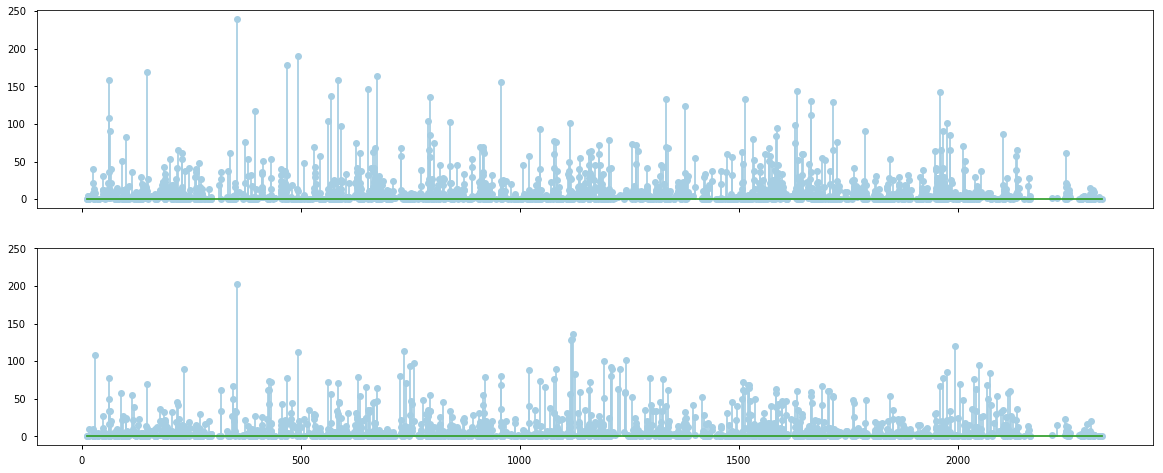

In [77]:
early = clusters[clusters.ident == 3].index.tolist()
cnts = dat[early].sum(axis=1)
cnts.name = 'counts'
merged = chrx.join(cnts).dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=True, sharex=True)
ax1.stem(merged.window, merged['counts'])

late = clusters[clusters.ident == 4].index.tolist()
cnts = dat[late].sum(axis=1)
cnts.name = 'counts'
merged = chrx.join(cnts).dropna()

ax2.stem(merged.window, merged['counts'])

<Container object of 3 artists>

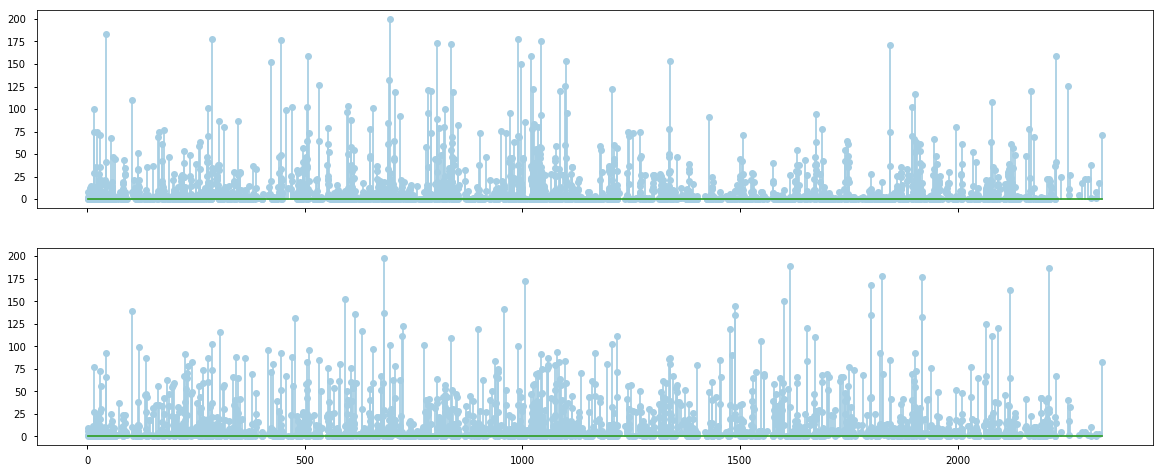

In [78]:
early = clusters[clusters.ident == 3].index.tolist()
cnts = dat[early].sum(axis=1)
cnts.name = 'counts'
merged = chr2L.join(cnts).dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=True, sharex=True)
ax1.stem(merged.window, merged['counts'])

late = clusters[clusters.ident == 4].index.tolist()
cnts = dat[late].sum(axis=1)
cnts.name = 'counts'
merged = chr2L.join(cnts).dropna()

ax2.stem(merged.window, merged['counts'])

<Container object of 3 artists>

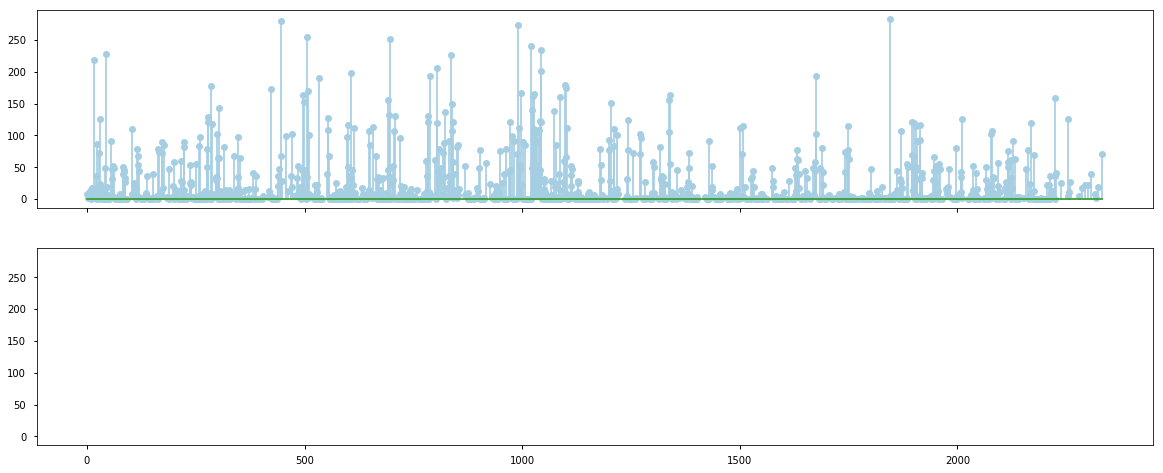

In [85]:
early = clusters[clusters.ident == 3].index.tolist()
cnts = dat[early].sum(axis=1)
cnts.name = 'counts'
merged = chr2L.join(cnts).dropna().groupby('window').counts.sum().sort_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=True, sharex=True)
ax1.stem(merged.index.tolist(), merged.values)

In [84]:
merged

window
1         8.025147
3         1.941617
6         1.978784
7        12.315842
8         4.975053
9         0.000000
10       14.374495
11       17.094694
12       11.164043
13        1.003026
14        2.186201
15       15.238750
16      217.906549
21       35.552482
22       87.402541
23        0.759457
24        0.416020
25        1.708635
26       17.360713
27        3.038543
28       71.922894
29       22.965768
30      125.666103
31       21.602012
32        0.000000
33        6.729841
36       12.214783
40        0.074033
41       15.256067
42       48.338930
           ...    
2202      0.142502
2204      0.000000
2205     22.397569
2206      0.103230
2207      1.671843
2208      0.530665
2209      0.000000
2211     22.644034
2212      0.000000
2213     35.682900
2214      8.147115
2217     12.333502
2223      0.000000
2224     36.945113
2225    158.400952
2226     40.916096
2237     24.650617
2254    125.458407
2255      4.763709
2256     10.738230
2258     26.613154
2280 

In [82]:
merged.groupby('window').counts.sum()

window
1        14.482038
3         1.895611
6         0.000000
7         1.460624
8         0.769218
9         1.830738
10        1.881790
11        8.809532
12        4.509512
13       11.741912
14        4.265134
15        9.248377
16      113.595974
21       18.389521
22       10.316074
23        8.398956
24       22.389779
25        1.190424
26        1.418783
27       22.301624
28       18.244806
29       48.991134
30       95.837610
31        7.439738
32        1.973856
33       85.628303
36        5.428077
40       15.211920
41        0.000000
42        7.905906
           ...    
2202     45.589128
2204      1.871921
2205     28.864174
2206     19.088253
2207     42.908836
2208      3.044529
2209     26.482022
2211    218.650216
2212     14.914119
2213     10.847730
2214      6.575696
2217      3.944772
2223      0.000000
2224     21.521108
2225     67.217081
2226     15.066429
2237      4.795070
2254     40.612836
2255      1.382151
2256     17.405235
2258     32.663048
2280 